In [1]:
import os
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import tikzplotlib

In [2]:
base_dir = '/share/home/houedry/projects/DifferentiableHyperbolicity/hyperbolicity/expes/results_expes/sensibility_analysis/distance_reg'

results_dict = defaultdict(list)

for subfolder in os.listdir(base_dir):
    subfolder_path = os.path.join(base_dir, subfolder)
    
    if os.path.isdir(subfolder_path):
        for file in os.listdir(subfolder_path):
            if file.endswith('.csv'):
                file_path = os.path.join(subfolder_path, file)
                
                df = pd.read_csv(file_path)
                
                df.columns = df.columns.str.strip().str.lower()
                
                if 'scale_delta' not in df.columns or 'mean_optim_distortion' not in df.columns:
                    print(f"Warning: Missing required columns in {file_path}. Skipping this file.")
                    continue
                
                for _, row in df.iterrows():
                    scale_delta = row['distance_reg']
                    mean_optim_distortion = row['mean_optim_distortion']
                    
                    if len(results_dict[scale_delta]) < 5:
                        results_dict[scale_delta].append(mean_optim_distortion)

results_dict = dict(results_dict)

for scale_delta, distortions in results_dict.items():
    print(f"scale_delta={scale_delta}: {distortions}")

scale_delta=0.0001: [5.2412810397148135, 5.030178174972535, 5.195249254703522, 5.198467472791672, 4.958947441577911]
scale_delta=0.001: [4.759212644100189, 4.681187751293183, 4.791556022167206, 4.833476192951203, 4.6824258685112]
scale_delta=0.01: [2.743841333389282, 2.617887144088745, 2.524664843082428, 2.354686107635498, 2.376957001686096]
scale_delta=0.1: [1.8624317121505736, 2.0489280104637144, 1.9160223841667172, 1.931912441253662, 1.8039998507499693]
scale_delta=1.0: [2.651135315895081, 2.6525920271873478, 2.667305073738098, 2.7515347719192507, 2.66672021150589]
scale_delta=10.0: [3.178080043792725, 3.167570552825928, 3.185274374485016, 3.188957154750824, 3.171691167354584]


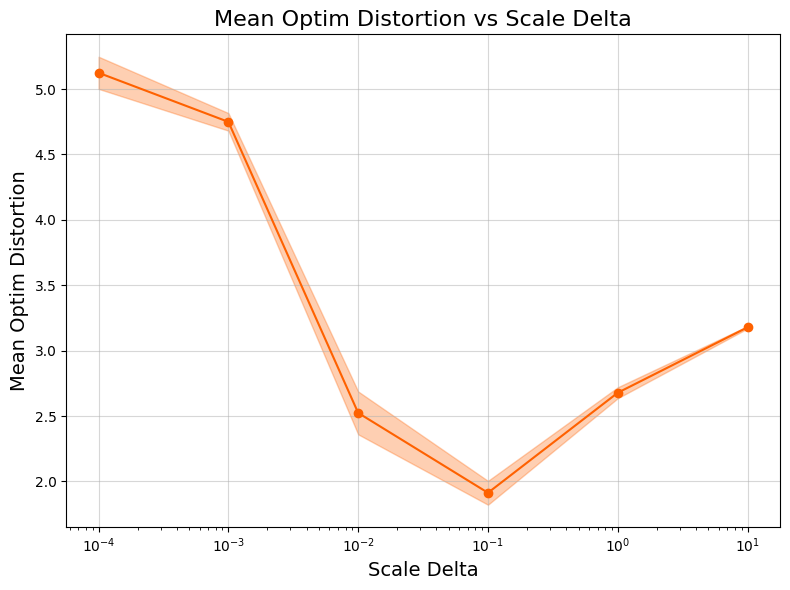

In [4]:
scale_deltas = sorted(results_dict.keys())
means = [sum(distortions) / len(distortions) for distortions in results_dict.values()]
stds = [pd.Series(distortions).std() for distortions in results_dict.values()]

plt.figure(figsize=(8, 6))
plt.plot(scale_deltas, means, label='Mean Optim Distortion', color='#FE6100',  marker='o')  
plt.fill_between(scale_deltas, 
                 [m - s for m, s in zip(means, stds)], 
                 [m + s for m, s in zip(means, stds)], 
                 color='#FE6100', alpha=0.3, label='±1 Std Dev')

# Add labels and title
plt.xlabel('Scale Delta', fontsize=14)
plt.ylabel('Mean Optim Distortion', fontsize=14)
plt.title('Mean Optim Distortion vs Scale Delta', fontsize=16)
plt.xscale('log')
legend = plt.legend(fontsize=12)
legend.remove()
plt.grid(alpha=0.5)
plt.tight_layout()
tikzplotlib.save("sensibility_analysis_rd_plot.tex")
plt.show()